In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:,:2]

In [4]:
def kmeans(X,k,max_iters=100):
    np.random.seed(42)
    centers = X[np.random.choice(X.shape[0],k,replace = False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return labels,centers

In [5]:
k = 3
labels,centers = kmeans(X,k)

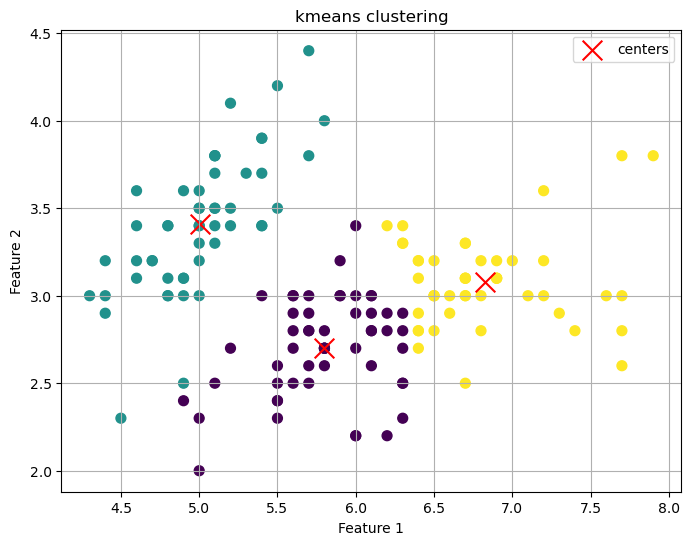

In [14]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',marker='o',s=50)
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,marker='x',label='centers')
plt.title('kmeans clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()